# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('heart_disease_dataset.csv')

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'target'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [11]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [12]:
clf = LogisticRegression()

## 6.2. Train Model

In [13]:
clf.fit(X_train_scaled, y_train)

LogisticRegression()

## 6.3. Model's Weight & Bias

In [14]:
clf.coef_

array([[-0.63308677, -1.37821822,  1.96346482, -1.27444246, -0.71579924,
         0.36682469,  0.27544452,  1.37438835, -0.7972562 , -1.78527409,
         1.25917415, -1.87983491, -1.6079892 ]])

In [15]:
clf.intercept_

array([1.81266395])

# 7. Prediction

## 7.1. Training Set

In [16]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [17]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

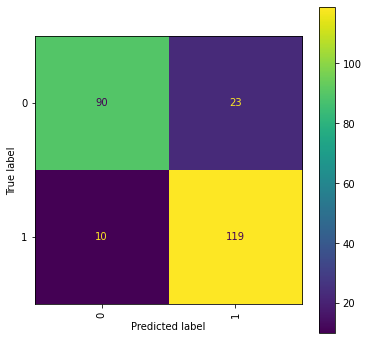

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_train_scaled, y_train, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.1.2. Scoring

In [19]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [20]:
print('accuracy =', report['accuracy'])

accuracy = 0.8636363636363636


In [21]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
0,0.900000,0.796460,0.845070,113.000000
1,0.838028,0.922481,0.878229,129.000000
accuracy,0.863636,0.863636,0.863636,0.863636
macro avg,0.869014,0.859470,0.861650,242.000000
weighted avg,0.866965,0.863636,0.862746,242.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

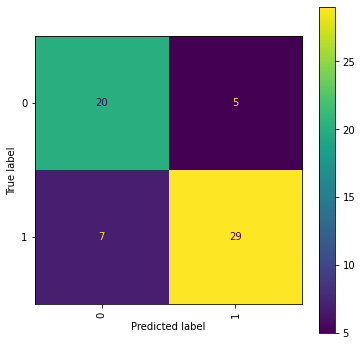

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_test_scaled, y_test, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.2.2. Scoring

In [23]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [24]:
print('accuracy =', report['accuracy'])

accuracy = 0.8032786885245902


In [25]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
0,0.740741,0.800000,0.769231,25.000000
1,0.852941,0.805556,0.828571,36.000000
accuracy,0.803279,0.803279,0.803279,0.803279
macro avg,0.796841,0.802778,0.798901,61.000000
weighted avg,0.806957,0.803279,0.804251,61.000000


# 9. Save Model

In [26]:
import pickle

In [27]:
pickle.dump((clf, 
             feature_name),  open('logistic_regression_model.pickle', 'wb'))